In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [3]:
df = pd.read_csv("../100_data/102_processed/combined_file.csv")
df["UTC_Time"] = pd.to_datetime(df["UTC_Time"])
df

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_29387/1464735981.py:1: DtypeWarning: Columns (22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../100_data/102_processed/combined_file.csv")


,Keyword,Post_URL,Author_Name,Author_Web_Page_URL,Author_Handle,Verified_Status,UTC_Time,Ads,Tweet_Content,Post_ID,...,Reply_to_Whom,Reply_to_Whom_URL,Reply_to_Whom_Username,Reply_to_Whom_Handle,Language,Unnamed: 9,AI Label,Label,Labels,LABELS
0,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Tomas Marquez,https://x.com/TomasMa16498730,TomasMa16498730,False,2023-01-01 01:56:24+00:00,False,"Free unlimited data, calls, text with an ID ca...",1.609368e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
1,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Ezer,https://x.com/EzerRatchaga,EzerRatchaga,False,2023-01-01 17:06:22+00:00,False,"👉 10 years of EV growth\n\nIn 2011, around 55,...",1.609597e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
2,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 13:42:00+00:00,False,The world’s first commercial solar electric ve...,1.609545e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
3,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 15:04:00+00:00,False,Nickel is a key component in most lithium-ion ...,1.609566e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
4,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Mashable,https://x.com/mashable,mashable,True,2023-01-01 19:40:30+00:00,False,This experimental road is one very long charge...,1.609636e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83622,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Stuff,https://x.com/NZStuff,NZStuff,False,2021-05-26 22:38:33+00:00,False,Electric vehicles to make up 40 per cent of Fo...,1.397684e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
83623,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 17:41:00+00:00,False,Ford: Electric vehicles to be 40% of global sa...,1.397609e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
83624,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 18:11:00+00:00,False,"Climate ambition, push for electric vehicles d...",1.397616e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
83625,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Malay Mail,https://x.com/malaymail,malaymail,True,2021-05-26 15:05:53+00:00,False,Ford says 40pc of sales to be electric vehicle...,1.397570e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN


In [25]:
tweet_mean = df["Tweet_Content"].str.len().mean()
print(tweet_mean)
tweet_std = df["Tweet_Content"].str.len().std()
df["Tweet_Content"].str.len().quantile([0.25, 0.5, 0.75])

198.49152217415792


0.25    130.0
0.50    204.0
0.75    271.0
Name: Tweet_Content, dtype: float64

In [10]:
df["Length"] = df["Tweet_Content"].str.len()
df

,Keyword,Post_URL,Author_Name,Author_Web_Page_URL,Author_Handle,Verified_Status,UTC_Time,Ads,Tweet_Content,Post_ID,...,Reply_to_Whom_URL,Reply_to_Whom_Username,Reply_to_Whom_Handle,Language,Unnamed: 9,AI Label,Label,Labels,LABELS,Length
0,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Tomas Marquez,https://x.com/TomasMa16498730,TomasMa16498730,False,2023-01-01 01:56:24+00:00,False,"Free unlimited data, calls, text with an ID ca...",1.609368e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,199.0
1,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Ezer,https://x.com/EzerRatchaga,EzerRatchaga,False,2023-01-01 17:06:22+00:00,False,"👉 10 years of EV growth\n\nIn 2011, around 55,...",1.609597e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,198.0
2,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 13:42:00+00:00,False,The world’s first commercial solar electric ve...,1.609545e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,215.0
3,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 15:04:00+00:00,False,Nickel is a key component in most lithium-ion ...,1.609566e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,190.0
4,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Mashable,https://x.com/mashable,mashable,True,2023-01-01 19:40:30+00:00,False,This experimental road is one very long charge...,1.609636e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83622,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Stuff,https://x.com/NZStuff,NZStuff,False,2021-05-26 22:38:33+00:00,False,Electric vehicles to make up 40 per cent of Fo...,1.397684e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,95.0
83623,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 17:41:00+00:00,False,Ford: Electric vehicles to be 40% of global sa...,1.397609e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,81.0
83624,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 18:11:00+00:00,False,"Climate ambition, push for electric vehicles d...",1.397616e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,102.0
83625,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Malay Mail,https://x.com/malaymail,malaymail,True,2021-05-26 15:05:53+00:00,False,Ford says 40pc of sales to be electric vehicle...,1.397570e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,92.0


In [36]:
df = df.loc[~df["Length"].isna()]
df = df.loc[~df["UTC_Time"].isna()]

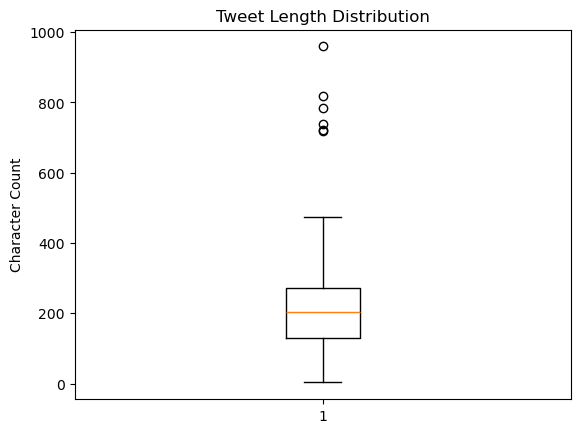

In [22]:
length = pd.Series(df["Length"])
fig, ax = plt.subplots()

ax.boxplot(length)
ax.set_title("Tweet Length Distribution")
ax.set_ylabel("Character Count")
plt.show()

In [44]:
df["month"] = df["UTC_Time"].dt.month
df["year"] = df["UTC_Time"].dt.year
df_group = df.groupby(["year", "month"], as_index=False)["Tweet_Content"].count()
df_group["month_year"] = (
    pd.to_datetime(df_group["month"], format="%m").dt.month_name()
    + " "
    + df_group["year"].astype(str)
)
df_group

,year,month,Tweet_Content,month_year
0,2020,1,1691,January 2020
1,2020,2,1604,February 2020
2,2020,3,1626,March 2020
3,2020,4,1615,April 2020
4,2020,5,826,May 2020
5,2020,6,2782,June 2020
6,2020,7,2233,July 2020
7,2020,8,3047,August 2020
8,2020,9,874,September 2020
9,2021,1,2822,January 2021


In [45]:
df_group.loc[8.5] = [2020, 10, None, "October 2020"]
df_group.loc[8.6] = [2020, 11, None, "November 2020"]
df_group.loc[8.7] = [2020, 12, None, "December 2020"]
df_group.loc[18.1] = [2021, 11, None, "November 2021"]
df_group.loc[18.2] = [2021, 12, None, "December 2021"]
df_group.loc[28.1] = [2022, 11, None, "November 2022"]
df_group.loc[28.2] = [2022, 12, None, "December 2022"]
df_group.loc[31.1] = [2023, 4, None, "April 2023"]
df_group.loc[31.2] = [2023, 5, None, "May 2023"]
df_group.loc[35] = [2023, 9, None, "September 2023"]
df_group.loc[36] = [2023, 10, None, "October 2023"]
df_group.loc[37] = [2023, 11, None, "November 2023"]
df_group.loc[38] = [2023, 12, None, "December 2023"]
# date_index = pd.date_range("01/01/2020", periods=48, freq="MS")
# df_group.reindex(date_index)
df_group = df_group.sort_index().reset_index()
df_group

,index,year,month,Tweet_Content,month_year
0,0.0,2020,1,1691,January 2020
1,1.0,2020,2,1604,February 2020
2,2.0,2020,3,1626,March 2020
3,3.0,2020,4,1615,April 2020
4,4.0,2020,5,826,May 2020
5,5.0,2020,6,2782,June 2020
6,6.0,2020,7,2233,July 2020
7,7.0,2020,8,3047,August 2020
8,8.0,2020,9,874,September 2020
9,8.5,2020,10,None,October 2020


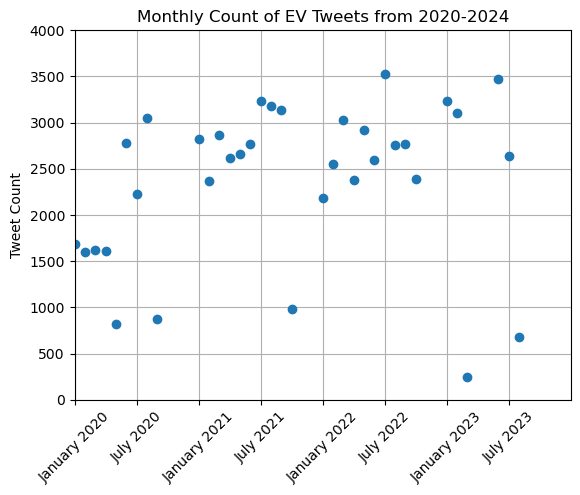

In [52]:
fig, ax = plt.subplots()

ax.plot(df_group["month_year"], df_group["Tweet_Content"], "o")
plt.title("Monthly Count of EV Tweets from 2020-2024")
plt.ylabel("Tweet Count")
ax.set(ylim=(0, 4000), xlim=(0, 48), xticks=np.arange(0, 48, 6))
ax.tick_params(axis="x", labelrotation=45)
# plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Trained Data

In [54]:
train_df = pd.read_csv("../100_data/102_processed/full_cleaned_df.csv")
train_df

,Unnamed: 0,Tweet_Content,Labels,Cleaned_Tweets,Sentiment
0,0,If you ask me $NIO ET7 is on elf the best look...,POSITIVE,if you ask me nio et7 is on elf the best looki...,2
1,1,Here are the annual UK vehicle registration % ...,NEUTRAL,here are the annual uk vehicle registration fo...,1
2,2,Robert Downey Jr. turns his classic cars into ...,NEUTRAL,robert downey jr turns his classic cars into e...,1
3,3,The development of Electric vehicles is becomi...,POSITIVE,the development of electric vehicles is becomi...,2
4,4,Happy Valentine's day! Today we share out love...,POSITIVE,happy valentines day today we share out love w...,2
...,...,...,...,...,...
298,298,We will be part of the conversations on the op...,NEUTRAL,we will be part of the conversations on the op...,1
299,299,WATCH: British company Lunaz rebuilds old dies...,NEUTRAL,watch british company lunaz rebuilds old diese...,1
300,300,Electric Vehicle morons...\n\nGo check out the...,NEGATIVE,electric vehicle morons go check out the price...,0
301,301,Program replaces dirty diesel with electric ve...,POSITIVE,program replaces dirty diesel with electric ve...,2


In [59]:
train_df.loc[train_df["Tweet_Content"].isna()]
train_df["tweet_len"] = train_df["Tweet_Content"].str.len()
train_df["clean_len"] = train_df["Cleaned_Tweets"].str.len()
train_df

,Unnamed: 0,Tweet_Content,Labels,Cleaned_Tweets,Sentiment,tweet_len,clean_len
0,0,If you ask me $NIO ET7 is on elf the best look...,POSITIVE,if you ask me nio et7 is on elf the best looki...,2,137,110
1,1,Here are the annual UK vehicle registration % ...,NEUTRAL,here are the annual uk vehicle registration fo...,1,276,202
2,2,Robert Downey Jr. turns his classic cars into ...,NEUTRAL,robert downey jr turns his classic cars into e...,1,146,117
3,3,The development of Electric vehicles is becomi...,POSITIVE,the development of electric vehicles is becomi...,2,294,266
4,4,Happy Valentine's day! Today we share out love...,POSITIVE,happy valentines day today we share out love w...,2,120,89
...,...,...,...,...,...,...,...
298,298,We will be part of the conversations on the op...,NEUTRAL,we will be part of the conversations on the op...,1,302,227
299,299,WATCH: British company Lunaz rebuilds old dies...,NEUTRAL,watch british company lunaz rebuilds old diese...,1,198,170
300,300,Electric Vehicle morons...\n\nGo check out the...,NEGATIVE,electric vehicle morons go check out the price...,0,271,258
301,301,Program replaces dirty diesel with electric ve...,POSITIVE,program replaces dirty diesel with electric ve...,2,118,68


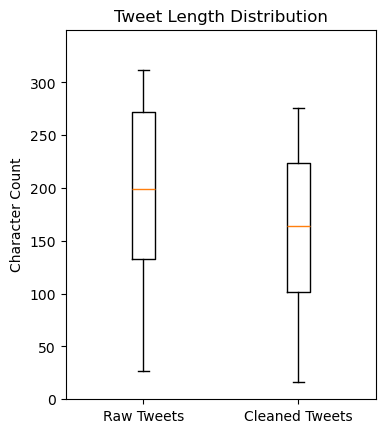

In [91]:
fig, ax = plt.subplots()

ax.boxplot(
    train_df[["tweet_len", "clean_len"]], labels=["Raw Tweets", "Cleaned Tweets"]
)
ax.set(ylim=(0, 350), yticks=np.arange(0, 350, 50))
ax.set_title("Tweet Length Distribution")
ax.set_ylabel("Character Count")
fig.set_figwidth(4)
plt.show()

In [77]:
train_df["clean_len"].mean()

161.2046204620462

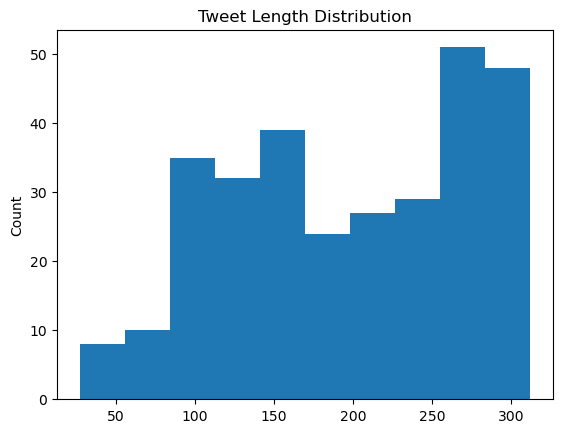

In [79]:
fig, ax = plt.subplots()

ax.hist(train_df["tweet_len"])
# ax.set(ylim=(0, 350), yticks=np.arange(0, 350, 50))
ax.set_title("Tweet Length Distribution")
ax.set_ylabel("Count")
plt.show()

# Proportions

In [92]:
train_df["Labels"].value_counts()

Labels
NEUTRAL     154
POSITIVE     92
NEGATIVE     57
Name: count, dtype: int64

In [98]:
training = pd.read_csv("../100_data/102_processed/real_training_data.csv")
testing = pd.read_csv("../100_data/102_processed/real_testing_data.csv")
testing.columns

Index(['Unnamed: 0', 'Date', 'Tweet_Content', 'Manual_Testing_Labels'], dtype='object')

In [99]:
training["Manual_Training_Labels"] = training["Manual_Training_Labels"].str.strip()
training.loc[
    training["Manual_Training_Labels"] == "NEGTIVE", ["Manual_Training_Labels"]
] = "NEGATIVE"
testing["Manual_Testing_Labels"] = testing["Manual_Testing_Labels"].str.strip()
testing.loc[
    testing["Manual_Testing_Labels"] == "NEGTIVE", ["Manual_Testing_Labels"]
] = "NEGATIVE"

In [102]:
print(training["Manual_Training_Labels"].value_counts())
testing["Manual_Testing_Labels"].value_counts()

Manual_Training_Labels
NEUTRAL     101
POSITIVE     62
NEGATIVE     37
Name: count, dtype: int64


Manual_Testing_Labels
NEUTRAL     53
POSITIVE    30
NEGATIVE    20
Name: count, dtype: int64

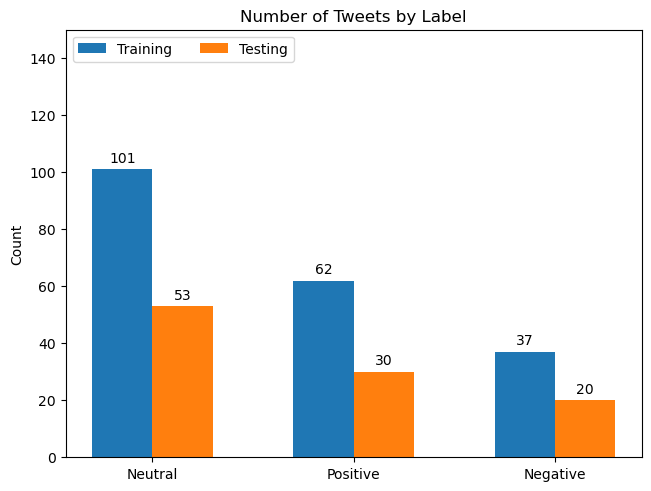

In [112]:
species = ("Neutral", "Positive", "Negative")
penguin_means = {
    "Training": training["Manual_Training_Labels"].value_counts(),
    "Testing": testing["Manual_Testing_Labels"].value_counts(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Count")
ax.set_title("Number of Tweets by Label")
ax.set_xticks(x + width / 2, species)
ax.legend(loc="upper left", ncols=3)
ax.set_ylim(0, 150)

plt.show()

# Vader Metrics

In [124]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()
list1 = []

for row in testing["Tweet_Content"]:
    scores = analyzer.polarity_scores(row)
    list1.append(scores)

score_list = []
for score in list1:
    score_list.append(score["compound"])
testing["scores"] = score_list
testing

,Unnamed: 0,Date,Tweet_Content,Manual_Testing_Labels,scores,vader_labels
0,0,2020-02-07,Find out why electric vehicles are a smart tra...,POSITIVE,0.1280,NEUTRAL
1,1,2020-02-08,How Soon Will Electric Vehicles Kill The Gasol...,NEUTRAL,-0.6908,NEGATIVE
2,2,2020-02-18,AI delivers a battery boost to electric vehicl...,NEUTRAL,0.1531,NEUTRAL
3,3,2020-03-04,There is so much anti-electric vehicles propag...,POSITIVE,-0.1779,NEUTRAL
4,4,2020-03-17,With the purchase of fully electric vehicles a...,NEUTRAL,0.5574,POSITIVE
...,...,...,...,...,...,...
98,98,2022-06-11,Idk why they make every new electric vehicle s...,NEGATIVE,-0.6604,NEGATIVE
99,99,2022-06-22,BIDEN has a plan to help control gas prices.\n...,NEGATIVE,-0.4404,NEUTRAL
100,100,2022-06-26,Toyota is recalling all of its new battery-pow...,NEGATIVE,0.1779,NEUTRAL
101,101,2022-06-29,Exciting partnership between @wmgwarwick and @...,POSITIVE,0.4939,NEUTRAL


In [114]:
testing["vader_labels"] = pd.cut(
    testing["scores"],
    bins=[-2, -0.5, 0.5, 1],
    labels=["NEGATIVE", "NEUTRAL", "POSITIVE"],
)
testing

,Unnamed: 0,Date,Tweet_Content,Manual_Testing_Labels,scores,vader_labels
0,0,2020-02-07,Find out why electric vehicles are a smart tra...,POSITIVE,0.1280,NEUTRAL
1,1,2020-02-08,How Soon Will Electric Vehicles Kill The Gasol...,NEUTRAL,-0.6908,NEGATIVE
2,2,2020-02-18,AI delivers a battery boost to electric vehicl...,NEUTRAL,0.1531,NEUTRAL
3,3,2020-03-04,There is so much anti-electric vehicles propag...,POSITIVE,-0.1779,NEUTRAL
4,4,2020-03-17,With the purchase of fully electric vehicles a...,NEUTRAL,0.5574,POSITIVE
...,...,...,...,...,...,...
98,98,2022-06-11,Idk why they make every new electric vehicle s...,NEGATIVE,-0.6604,NEGATIVE
99,99,2022-06-22,BIDEN has a plan to help control gas prices.\n...,NEGATIVE,-0.4404,NEUTRAL
100,100,2022-06-26,Toyota is recalling all of its new battery-pow...,NEGATIVE,0.1779,NEUTRAL
101,101,2022-06-29,Exciting partnership between @wmgwarwick and @...,POSITIVE,0.4939,NEUTRAL


In [116]:
print(confusion_matrix(testing["Manual_Testing_Labels"], testing["vader_labels"]))
print(classification_report(testing["Manual_Testing_Labels"], testing["vader_labels"]))

[[ 4 12  4]
 [ 2 37 14]
 [ 0 18 12]]
              precision    recall  f1-score   support

    NEGATIVE       0.67      0.20      0.31        20
     NEUTRAL       0.55      0.70      0.62        53
    POSITIVE       0.40      0.40      0.40        30

    accuracy                           0.51       103
   macro avg       0.54      0.43      0.44       103
weighted avg       0.53      0.51      0.49       103



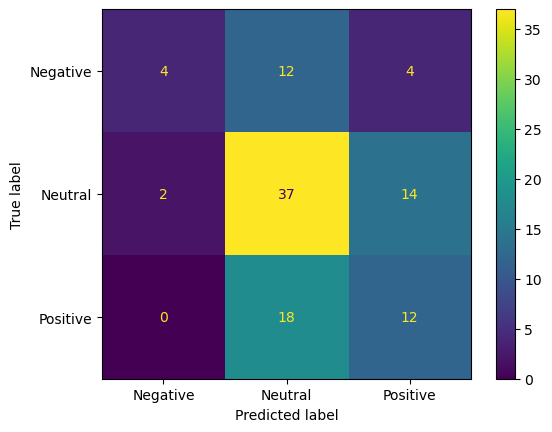

In [125]:
# Sample data
data = confusion_matrix(testing["Manual_Testing_Labels"], testing["vader_labels"])

disp = ConfusionMatrixDisplay(
    confusion_matrix=data, display_labels=["Negative", "Neutral", "Positive"]
)

disp.plot()
plt.show()